In [1]:
import gym_super_mario_bros # Game
from nes_py.wrappers import JoypadSpace # Joypad
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT # Controls

In [2]:
SIMPLE_MOVEMENT

[['NOOP'],
 ['right'],
 ['right', 'A'],
 ['right', 'B'],
 ['right', 'A', 'B'],
 ['A'],
 ['left']]

In [3]:
env = gym_super_mario_bros.make("SuperMarioBros-v0")
env = JoypadSpace(env, SIMPLE_MOVEMENT) # Simplifies AI learning

In [4]:
env.action_space

Discrete(7)

In [5]:
env.observation_space.shape

(240, 256, 3)

In [6]:
env.action_space

Discrete(7)

In [7]:
done = True # Create flag
for step in range(100000):
    if done: # Start the game to begin with
        # Start actual game
        env.reset()
    state, reward, done, info = env.step(env.action_space.sample())
    env.render()
env.close()

/Users/liranpod/miniconda3/envs/experimental/lib/python3.10/site-packages/gym_super_mario_bros/smb_env.py:148: RuntimeWarning: overflow encountered in scalar subtract
  return (self.ram[0x86] - self.ram[0x071c]) % 256


KeyboardInterrupt: 

In [8]:
state = env.reset()
state.shape

(240, 256, 3)

In [9]:
env.step(1)[3] # 4 values as mentioned above

{'coins': 0,
 'flag_get': False,
 'life': 2,
 'score': 0,
 'stage': 1,
 'status': 'small',
 'time': 400,
 'world': 1,
 'x_pos': 40,
 'x_pos_screen': 40,
 'y_pos': 79}

In [10]:
# Grayscale & frame-stacking as preprocessing

In [11]:
# Preprocessing wrappers
from gym.wrappers import FrameStack, GrayScaleObservation
# Vectorization wrappers
from stable_baselines3.common.vec_env import VecFrameStack, DummyVecEnv
# Matplotlib
from matplotlib import pyplot as plt

In [12]:
state = env.reset()

In [13]:
state.shape

(240, 256, 3)

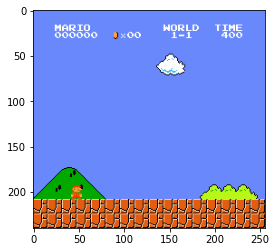

In [14]:
plt.imshow(state)

In [19]:
# Base environment
env = gym_super_mario_bros.make("SuperMarioBros-v0")
# Simplify controls
env = JoypadSpace(env, SIMPLE_MOVEMENT) 
# Grayscale
env = GrayScaleObservation(env, keep_dim=True) 
# Wrap inside dummy environment
env = DummyVecEnv([lambda: env])
# Stack frames
env = VecFrameStack(env, 4, channels_order="last")

In [42]:
state = env.reset()
state.shape

(1, 240, 256, 4)

In [64]:
state, reward, done, info = env.step([5]) # Jump

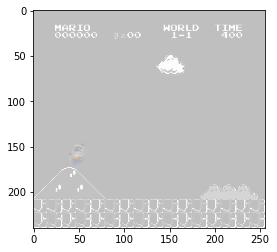

In [65]:
plt.imshow(state[0])

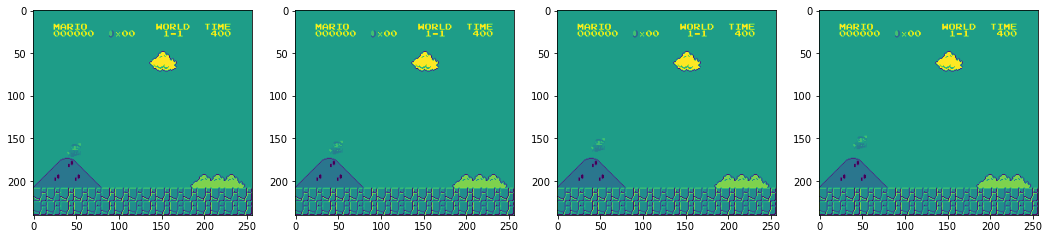

In [66]:
plt.figure(figsize=(18,15))
for idx in range(state.shape[3]):
    plt.subplot(1, 4, idx+1)
    plt.imshow(state[0][:,:,idx])
plt.show()

In [67]:
# File paths
import os
# Algorithm
from stable_baselines3 import PPO
# Callback
from stable_baselines3.common.callbacks import BaseCallback

In [68]:
class TrainAndLoggingCallback(BaseCallback):

    def __init__(self, check_freq, save_path, verbose=1):
        super(TrainAndLoggingCallback, self).__init__(verbose)
        self.check_freq = check_freq
        self.save_path = save_path

    def _init_callback(self):
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok=True)

    def _on_step(self):
        if self.n_calls % self.check_freq == 0:
            model_path = os.path.join(self.save_path, 'best_model_{}'.format(self.n_calls))
            self.model.save(model_path)

        return True

In [69]:
CHECKPOINT_DIR = './train/'
LOG_DIR = './logs/'

In [70]:
# Setup model saving callback
callback = TrainAndLoggingCallback(check_freq=10000, save_path=CHECKPOINT_DIR)

In [ ]:
# This is the AI model started
model = PPO('CnnPolicy', env, verbose=1, tensorboard_log=LOG_DIR, learning_rate=0.000001, 
            n_steps=512) 

In [ ]:
# Train the AI model, this is where the AI model starts to learn
model.learn(total_timesteps=1000000, callback=callback)

In [ ]:
model.save('test_model')